In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [62]:
tf.__version__

'2.3.0'

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
hotel_review = pd.read_csv('/content/drive/My Drive/data/Hotel_Reviews.csv')

In [65]:
hotel_review.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [66]:
hotel_review.shape

(515738, 17)

In [67]:
positive_review = hotel_review.loc[:,['Positive_Review']]
negative_review = hotel_review.loc[:,['Negative_Review']]

In [68]:
options = ['No Positive', 'No Negative']
selected_positive_review = positive_review.loc[~(positive_review['Positive_Review'] == "No Positive"), :]
selected_negative_review = negative_review.loc[~(negative_review['Negative_Review'] == "No Negative"), :]
selected_positive_review['is_positive'] = 1
selected_positive_review.columns = ['review', 'is_positive']
selected_positive_review.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1


In [69]:
selected_negative_review['is_postive'] = 0
selected_negative_review.columns = ['review', 'is_positive']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
selected_positive_review = selected_positive_review[:30000]
selected_negative_review = selected_negative_review[:30000]

In [71]:
print(selected_negative_review.shape)
print(selected_positive_review.shape)


(30000, 2)
(30000, 2)


In [72]:
reviews = selected_positive_review.append(selected_negative_review)

In [73]:
reviews.head(n=10)

,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
5,Good restaurant with modern design great chil...,1
6,The room is spacious and bright The hotel is ...,1
7,Good location Set in a lovely park friendly s...,1
9,The room was big enough and the bed is good T...,1
10,Rooms were stunningly decorated and really sp...,1


In [74]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# New section

In [75]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [76]:
# clean text data
reviews["review"] = reviews["review"].apply(lambda x: clean_text(x))

In [77]:
reviews_text = reviews['review'].tolist()
labels = reviews['is_positive'].tolist()

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)


#TOKENIZE
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('punkt')
complete_reviews=[] 
for review in reviews['review']:
  for sent in sent_tokenize(review):
    complete_reviews.append(sent)
print('complete_reviews done') 
final_corpus = [sentence for sentence in complete_reviews if sentence.strip() !='']
print('final corpus done')
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
complete_reviews done
final corpus done


In [78]:
# model parameters
vocab_size = 28593
embedding_dim = 128
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion=0.7

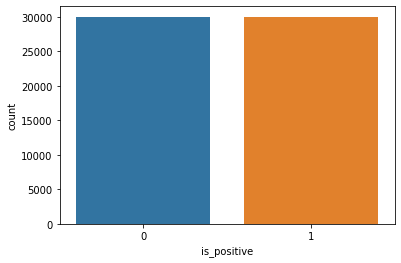

In [79]:
import seaborn as sns
sns.countplot(x="is_positive",data=reviews)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# splitting dataset using stratified sampling
x_train, x_val, y_train, y_val = train_test_split(reviews.review, 
                                                  reviews.is_positive, 
                                                  test_size=0.30, 
                                                  random_state=17,
                                                  stratify=reviews.is_positive.values
                                               )

In [82]:
import pandas as pd
data_train = pd.DataFrame()
data_test  = pd.DataFrame()
data_train['label'] = y_train
data_train['text'] = x_train
data_test['label'] = y_val
data_test['text'] = x_val

In [83]:
train_sentences = data_train['text'].tolist()
train_labels = data_train['label'].tolist()
test_sentences = data_test['text'].tolist()
test_labels = data_test['label'].tolist()
data_train.groupby(['label']).count()

,text
label,
0,21000
1,21000


In [84]:
#Ratio of +ve and -ve reviews in training dataset
ratio = str(data_train['label'].value_counts()[0]/data_train['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 1.0:1


In [85]:
y_train.head(n=10)

15393    0
12330    1
18976    0
26737    1
31241    1
33259    0
10836    0
30247    0
4817     0
15889    0
Name: is_positive, dtype: int64

In [86]:
!pip install bert-for-tf2

In [87]:
!pip install sentencepiece

In [88]:
import bert
!pip install "tensorflow_hub>=0.6.0"
import tensorflow_hub as hub

In [89]:
BertTokenizer = bert.bert_tokenization.FullTokenizer

In [90]:
model_url = "https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(model_url, trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()

In [91]:
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, to_lower_case)

In [92]:
tokenizer.tokenize("This hotel is sooo nice")
print(len(tokenizer.vocab))

28996


In [93]:
def tokenize_reviews(text_review):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_review))

In [94]:
tokenized_review = [tokenize_reviews(review) for review in reviews_text]

In [95]:
vocab_size = len(tokenizer.vocab) + 1
embedding_dim = 128
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion=0.7

In [96]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], train_sentences))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], test_sentences))

In [97]:
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))

In [98]:
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))

In [99]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")

In [100]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [101]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

In [102]:
print(len(train_labels))

42000


In [103]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' )
])

#compile model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
#model.build(input_shape=[len(train_padded),512,128])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 128)          3711616   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 128)          82048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 3,836,465
Trainable params: 3,836,465
Non-trainable params: 0
_________________________________________________________________


In [104]:
length = 128
vocab_size = len(tokenizer.vocab) + 1

In [105]:
history = model.fit(train_padded, train_labels, verbose=1, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
1313/1313 [==============================] - 212s 161ms/step - loss: 0.2172 - accuracy: 0.9171 - val_loss: 0.2005 - val_accuracy: 0.9260
Epoch 2/10
1313/1313 [==============================] - 214s 163ms/step - loss: 0.1559 - accuracy: 0.9440 - val_loss: 0.2018 - val_accuracy: 0.9261
Epoch 3/10
1313/1313 [==============================] - 208s 158ms/step - loss: 0.1260 - accuracy: 0.9564 - val_loss: 0.2165 - val_accuracy: 0.9253
Epoch 4/10
1313/1313 [==============================] - 213s 162ms/step - loss: 0.1039 - accuracy: 0.9644 - val_loss: 0.2292 - val_accuracy: 0.9232
Epoch 5/10
1313/1313 [==============================] - 212s 161ms/step - loss: 0.0864 - accuracy: 0.9704 - val_loss: 0.2526 - val_accuracy: 0.9254
Epoch 6/10
1313/1313 [==============================] - 208s 159ms/step - loss: 0.0762 - accuracy: 0.9736 - val_loss: 0.2821 - val_accuracy: 0.9241
Epoch 7/10
1313/1313 [==============================] - 210s 160ms/step - loss: 0.0681 - accuracy: 0.9766 - val_

In [108]:
from sklearn.metrics import confusion_matrix
x_pred = model.predict(test_padded)
x_pred = x_pred > 0.5
x_pred = x_pred.astype(int)
y_pred = test_labels

In [109]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(x_pred, y_pred)))
print("Precision: ",precision_score(y_pred, y_pred))
print("Recall: ",recall_score(y_pred, y_pred))
print("Accuracy: ",accuracy_score(y_pred,y_pred))
print("Confusion matrix: ")
confusion_matrix(y_pred, y_pred)

F1-score: 0.9215358931552587
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
Confusion matrix: 


array([[9000,    0],
       [   0, 9000]])

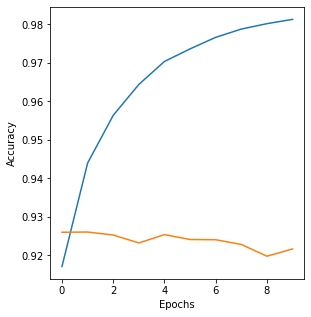

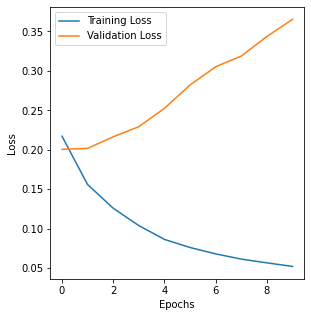

In [107]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()